In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

/Users/divsaksena/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/divsaksena/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
data = pd.read_csv("Camry_242_Spring2023.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MonthNumeric   174 non-null    int64  
 1   MonthFactor    174 non-null    object 
 2   Year           174 non-null    int64  
 3   CamrySales     174 non-null    int64  
 4   Unemployment   174 non-null    float64
 5   CamryQueries   174 non-null    int64  
 6   CPIAll         174 non-null    float64
 7   CPIEnergy      174 non-null    float64
 8   MilesTraveled  174 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 12.4+ KB


In [3]:
data.head()

,MonthNumeric,MonthFactor,Year,CamrySales,Unemployment,CamryQueries,CPIAll,CPIEnergy,MilesTraveled
0,1,January,2008,31601,5.0,40,212.174,226.775,253376
1,2,February,2008,34914,4.9,41,212.687,229.731,250551
2,3,March,2008,40487,5.1,51,213.448,233.349,248981
3,4,April,2008,40016,5.0,47,213.942,234.778,249101
4,5,May,2008,51291,5.4,54,215.208,243.924,248415


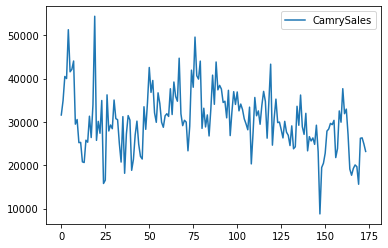

In [4]:
data.plot(y='CamrySales')

<ipython-input-5-cea6054161da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(), annot=True)


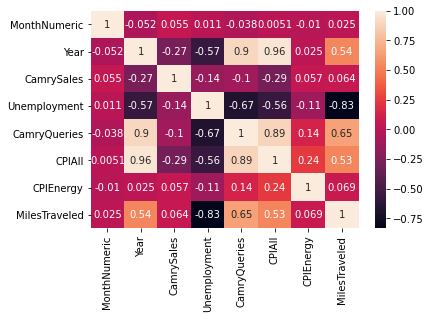

In [5]:
dataplot = sns.heatmap(data.corr(), annot=True)

In [25]:
# Creating train and test sets as per specifications
train = data[data['Year'] < 2019]
testA = data[(data['Year'] > 2018) & (data['Year'] < 2021)]
testB = data[data['Year'] > 2020]
testB

,MonthNumeric,MonthFactor,Year,CamrySales,Unemployment,CamryQueries,CPIAll,CPIEnergy,MilesTraveled,DollarPerGallon
156,1,January,2021,21771,6.3,76,262.200,209.328,258907,2.420
157,2,February,2021,23839,6.2,78,263.346,218.944,253624,2.587
158,3,March,2021,32541,6.0,92,265.028,231.127,267337,2.898
159,4,April,2021,29939,6.1,91,266.727,228.374,264108,2.948
160,5,May,2021,37676,5.8,91,268.599,229.874,268886,3.076
161,6,June,2021,31905,5.9,89,270.955,234.625,272791,3.157
162,7,July,2021,32959,5.4,87,272.184,238.447,274184,3.231
163,8,August,2021,27033,5.2,90,273.092,242.958,272447,3.255
164,9,Septeber,2021,19106,4.7,85,274.214,245.847,274621,3.272
165,10,October,2021,17691,4.6,85,276.590,255.010,275442,3.384


In [26]:
# Choose the features to be used
# Using all 5 features
cols = ['Unemployment', 'CamryQueries', 'CPIEnergy', 'CPIAll','MilesTraveled']
X_train = train[cols]
y_train = train['CamrySales']

# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)

# Fit the data to the model
model1 = sm.OLS(y_train, X_train).fit() #ordinary least squares method

print(model1.summary())
vif = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])], index=X_train.columns)
vif

                            OLS Regression Results                            
Dep. Variable:             CamrySales   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     4.722
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           0.000549
Time:                        15:11:57   Log-Likelihood:                -1339.1
No. Observations:                 132   AIC:                             2690.
Df Residuals:                     126   BIC:                             2707.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.056e+05   5.21e+04      2.026

/Users/divsaksena/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


const            9021.519801
Unemployment        4.140307
CamryQueries        6.955649
CPIEnergy           2.467946
CPIAll              7.425610
MilesTraveled      12.610832
dtype: float64

In [27]:
# Choose the features to be used
# Using 4 features
cols = ['Unemployment', 'CamryQueries', 'CPIEnergy', 'CPIAll']
X_train = train[cols]
y_train = train['CamrySales']

# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)

# Fit the data to the model
model2 = sm.OLS(y_train, X_train).fit() #ordinary least square
print(model2.summary())
vif = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])], index=X_train.columns)
vif

                            OLS Regression Results                            
Dep. Variable:             CamrySales   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     5.852
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           0.000235
Time:                        15:12:07   Log-Likelihood:                -1339.3
No. Observations:                 132   AIC:                             2689.
Df Residuals:                     127   BIC:                             2703.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.902e+04   2.32e+04      3.400   

/Users/divsaksena/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


const           1803.402777
Unemployment       3.010391
CamryQueries       6.217623
CPIEnergy          1.063965
CPIAll             5.642441
dtype: float64

In [32]:
cols = ['Unemployment', 'CamryQueries']
X_train = train[cols]
y_train = train['CamrySales']

# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)

# Fit the data to the model
model3 = sm.OLS(y_train, X_train).fit() #ordinary least square
print(model3.summary())
vif = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])], index=X_train.columns)
vif

                            OLS Regression Results                            
Dep. Variable:             CamrySales   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     3.798
Date:                Sun, 05 Feb 2023   Prob (F-statistic):             0.0250
Time:                        15:14:04   Log-Likelihood:                -1346.7
No. Observations:                 132   AIC:                             2699.
Df Residuals:                     129   BIC:                             2708.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          4.04e+04   6690.071      6.038   

/Users/divsaksena/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


const           135.714496
Unemployment      2.723800
CamryQueries      2.723800
dtype: float64

### Answers

a)i) My final equation is as follows: 
$CamrySales = 40400 - 970.072*(Unemployment) - 33.57*(CamryQueries)$.

The first coefficient (of unemployment) means that Camry Sales drop approximately 971 units in a month for every 1% ride in unemployment. The coefficient of CamryQueries suggests that sales wpuld drop by approx 33 units in a month for every additional unit of monthly Camry queuries. 

ii) For variable selection I used the method of variance inflation factors and eliminated CPIEnergy, MilesTraveled, and CPIAll. Most of the variables I eliminated also had 95% CIs that included zero. Although even CamryQueries had zero in the 95% CIs but I believed this to be a more important metric than the others because it is reasonable to expect that this would be a good proxy for demand. Additionally we would expect unemployment to be helpful in this prediction, too.  I did not remove CamryQueries from the regression equation as it was the most direct measure of how the demand for Camries could work.

iii) I am fairly confident of the sign of unemployment as we would expect them to move in opposite directions i.e if unemployment rises, camry sales would fall. However, the model also predicts a negative relationship with camry queries, which does not make sense to me. I would expect the online search queries to be positively related to actual camry sales. 

iv) The model, surprisingly, performs poorly after variable selection with an R^2 value of only 0.056, which is extremely low. The more variables removed, the worse the performance of the model becomes. I suspect this has something to do with the actual data.

## Part B: Seasonality

In [33]:
# Using the month factor variable

In [34]:
X_train = train[['Unemployment','CamryQueries','CPIAll','CPIEnergy','MilesTraveled','MonthFactor']]
model1b = smf.ols(formula = 'CamrySales ~ Unemployment + CamryQueries + CPIAll +CPIEnergy + MonthFactor + MilesTraveled', data = train).fit()
# Model summary
print(model1b.summary())

                            OLS Regression Results                            
Dep. Variable:             CamrySales   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     7.499
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           9.58e-12
Time:                        15:14:17   Log-Likelihood:                -1303.3
No. Observations:                 132   AIC:                             2641.
Df Residuals:                     115   BIC:                             2690.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Questions

i) The regression equation is as follows:
$CamrySales = 52540 -8454.28*(January) - 4070.32*(February) + 4295.97*(March) + 4123.44*(May) -152.165*(June) + 2059.1122*(July) +6371.06*(August)- 2473.15*(September) -3901.89*(October) - 5524.58*(November) -21.27*(December) - 2025.78*(Unemployment) - 137.09*(CamryQueries) -59.75*(CPIAll) + 73.88*(CPIEnergy) - 0.0038*(MilesTraveled)$

In terms of interpretation, if the current month is January January then it is expected to resuit in 8454.28 less Camrys sold. Similarly, we interpret the coefficient of the rest of the MonthFactor dummy variables.

ii) The training set R^2 value for this model is signficantly higher as compared to earlier (0.511 vs 0.059). Since most of the monthfactor variables don't include zero in their 95% CI along with Unemployment, we can consider them to be statistically significant. Intuitively this makes sense due to the prospect of seasonality in demand and unemployment being a good variable to use as per the last model, too. Surprisingly, CPIEnergy is also significant. 

iii) I do believe that adding MonthFactor as variable has greatly improved the performance of the model. This is evident in the signifcant improvement in the R^2 value. 

iv) One way to do this would be to use Fourier transform to decompose this time series into its constitutent frequencies and amplitudes. This would allow us to improve on the current model as we would be able to capture peaks better and understand this seasonal decomposition to a greater degree.

## Part C: Creating a New Model


In [35]:
# compute out of sample R-squared value using test set
def OSR2(model, df_train, df_test, dependentvar):
    y_test = df_test[dependentvar]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependentvar]))**2)
    return 1 - SSE/SST

In [36]:
# New model

# Fit the data to the model using this different method (lab 2)
X_train = train[['Unemployment','CamryQueries','MonthFactor']]
newmodel = smf.ols(formula = 'CamrySales ~ Unemployment + CamryQueries + MonthFactor', data = train).fit()
# Model summary
print(newmodel.summary())

                            OLS Regression Results                            
Dep. Variable:             CamrySales   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     7.337
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           2.27e-10
Time:                        15:48:58   Log-Likelihood:                -1311.3
No. Observations:                 132   AIC:                             2651.
Df Residuals:                     118   BIC:                             2691.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [37]:
# Computing OSR-squared for the two test sets 
print('New Model OSR^2 for Test Set A:', OSR2(newmodel, train, testA, 'CamrySales'))
print('New Model OSR^2 for Test Set B:', OSR2(newmodel, train, testB, 'CamrySales'))

New Model OSR^2 for Test Set A: 0.37953090461112937
New Model OSR^2 for Test Set B: 0.2676821638945862


### Questions

We see that while the R^2 on the test set is quite high at 0.447, the OSR^2 on Test Set A is slightly lower at 0.379 but the OSR^2 for Test Set B is much lower at 0.26. I think the OSR^2 is much lower here in these test sets due to the sudden and deep-impact of COVID on car buying patterns. 

## Using Additional variable


I chose the national average gas prices in the country because I believe this is a much better proxy to gather sentiment than using CPI energy as it is focused exclusively on gasoline prices used to drive cars. Since a Camry is a hybrid, this variable could do a good job in adding more nuance to our models. This is only one factor in capturing additional monthly information. Another closely related variable for hybribs would have been electric charging prices. (I found this dataset on the U.S Energy Information Administration website.)

In [38]:
gasdata = pd.read_csv("gasprices.csv")
gasdata.head()

,MonthFactor,Year,Dollar Per Gallon
0,January,2008,3.095
1,February,2008,3.078
2,March,2008,3.293
3,April,2008,3.507
4,May,2008,3.815


In [39]:
newdata = gasdata['Dollar Per Gallon']
data['DollarPerGallon']= newdata

In [40]:
newtrain = data[data['Year'] < 2019]
newtestA = data[(data['Year'] > 2018) & (data['Year'] < 2021)]
newtestB = data[data['Year'] > 2020]
newtrain

,MonthNumeric,MonthFactor,Year,CamrySales,Unemployment,CamryQueries,CPIAll,CPIEnergy,MilesTraveled,DollarPerGallon
0,1,January,2008,31601,5.0,40,212.174,226.775,253376,3.095
1,2,February,2008,34914,4.9,41,212.687,229.731,250551,3.078
2,3,March,2008,40487,5.1,51,213.448,233.349,248981,3.293
3,4,April,2008,40016,5.0,47,213.942,234.778,249101,3.507
4,5,May,2008,51291,5.4,54,215.208,243.924,248415,3.815
...,...,...,...,...,...,...,...,...,...,...
127,8,August,2018,30141,3.8,92,251.749,222.435,267900,2.914
128,9,Septeber,2018,27640,3.7,84,252.239,223.444,269877,2.915
129,10,October,2018,26914,3.8,80,252.862,226.462,270155,2.943
130,11,November,2018,24545,3.8,76,252.657,219.267,269052,2.736


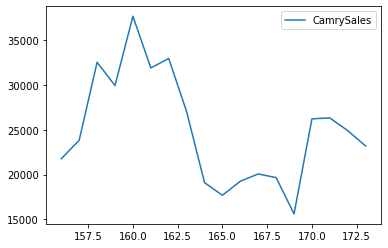

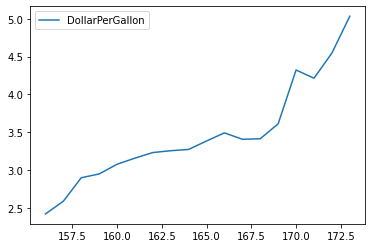

In [41]:
newtestB.plot(y=('CamrySales'))
newtestB.plot(y='DollarPerGallon')

In [42]:
## Creating final model 
X_train = newtrain[['Unemployment','CamryQueries','MonthFactor', 'DollarPerGallon']]
model5 = smf.ols(formula = 'CamrySales ~ Unemployment + CamryQueries + MonthFactor + DollarPerGallon', data = newtrain).fit()
# Model summary
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:             CamrySales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     9.093
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           3.42e-13
Time:                        15:49:06   Log-Likelihood:                -1301.8
No. Observations:                 132   AIC:                             2634.
Df Residuals:                     117   BIC:                             2677.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [22]:
len(newtestA), len(newtestB)

(24, 18)

In [23]:
# Calc OSR-squared 
print('Model 5 OSR^2 for New Test Set A:', OSR2(model5, newtrain, newtestA, 'CamrySales'))
print('Model 5 OSR^2 for New Test Set B:', OSR2(model5, newtrain, newtestB, 'CamrySales'))

Model 5 OSR^2 for New Test Set A: 0.4247729615374247
Model 5 OSR^2 for New Test Set B: -0.2750587100045305


Clearly, this model is our best performing yet with the highest R^2 value of 0.5211.

### Questions

I decided to pick the national average gas price for the same time period. Since a Camry is a hybrid, I thought it's sales would be affected, in part, by the trend in gas prices. The new feature definitely adds value as the R^2 value for the test set is higher at 0.52. However, I am confused as to why the OSR^2 for Test Set B is negative. This suggests some form fo extremet overfitting during the COVID period. The DollarPergallon variable that I added is significant since the 95% confidence interval does not contain 0. This is reaffirming of my choice of variable. 